### MARKOV CHAIN MONTE CARLO ###

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Acceptance ratio for symmetric proposal distribution:
\begin{equation}
a=\frac{\pi\left(\theta^{\prime}\right)}{\pi\left(\theta^{(t)}\right)} .
\end{equation}

In [73]:
### METROPOLIS HASTINGS ALGORITHM ###

def metropolis_hastings(n, target_dist, proposal_dist, chain_start):
    chain = np.zeros(n)
    x = chain_start
    accepted = 0 # count accepted values (looking for ~0.5)

    for i in range(n):
        # generate a candidate sample from the proposal distribution
        candidate = proposal_dist.rvs()

        # calculate acceptance ratio
        acceptance_ratio = min(1, target_dist.pdf(candidate) / target_dist.pdf(x))

        # accept or reject candidate
        if np.random.rand() < acceptance_ratio:
            x = candidate
            accepted += 1

        # add to chain
        chain[i] = x

    print(f"Acceptance rate: {accepted/n}")

    return chain

Text(0, 0.5, 'Density')

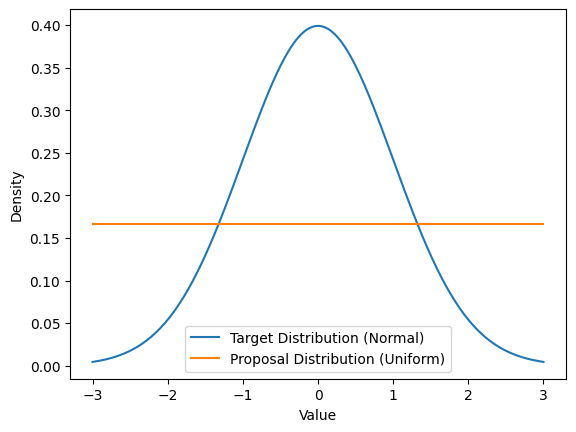

In [78]:
### GENERATE TARGET AND PROPOSAL DISTRIBUTIONS ###

mu = 0 # mean
sigma = 1 # standard deviation
norm_dist = stats.norm(mu, sigma)

l_bound = -3 # uniform lower bound
u_bound = 3 # uniform upper bound
uniform_dist = stats.uniform(l_bound, u_bound - l_bound)

# plot distributions
X = np.mgrid[l_bound:u_bound:200j]
plt.plot(X, norm_dist.pdf(X), label="Target Distribution (Normal)")
plt.plot(X, uniform_dist.pdf(X), label="Proposal Distribution (Uniform)")
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')

In [82]:
### GENERATE SAMPLE CHAIN ###

n = 1_000_000 # number of samples
chain_start = 0

chain = metropolis_hastings(n, norm_dist, uniform_dist, chain_start)

chain = chain[chain.size // 2:] # remove first half of chain to reduce impact of initial state
chain = chain[::10] # take every 10th sample to ensure independance of samples

print("Chain generated")

Acceptance rate: 0.528068
Chain generated


In [85]:
print(f"Chain Size: {len(chain)}")

Chain Size: 50000


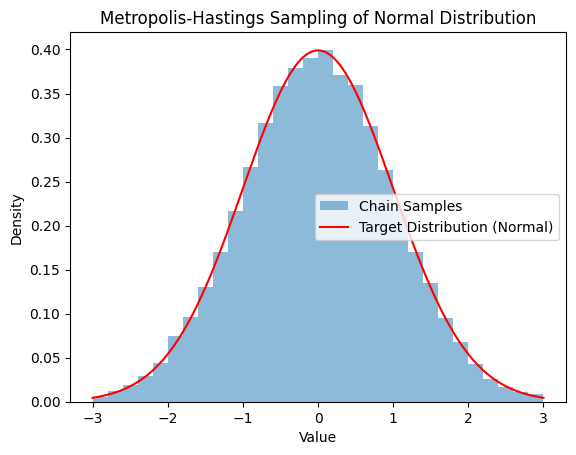

In [83]:
### VISUALIZE RESULTS ###

plt.hist(chain, bins=30, density=True, alpha=0.5, label="Chain Samples")
plt.plot(X, norm_dist.pdf(X), 'r', label="Target Distribution (Normal)")
plt.legend()
plt.title('Metropolis-Hastings Sampling of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

Given a variable $X$ described by a CDF:
$$
CDF = F_X
$$
If $u$ is a number sampled uniformly from $[0,1]$, then
$$
X = F_X^{-1}(u)
$$

Text(0.5, 1.0, 'Inverse Transform Sampling of Normal Distribution')

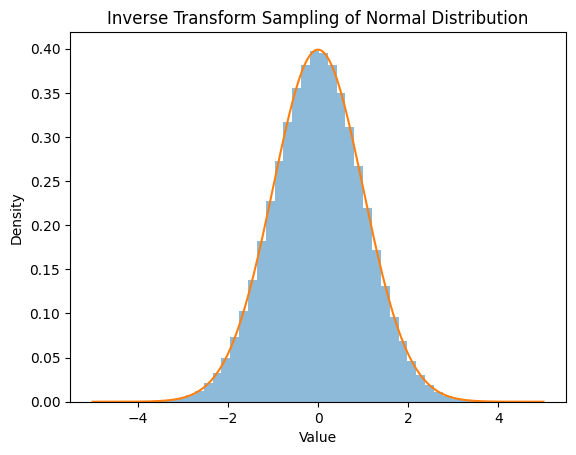

In [92]:
### INVERSE TRANSFORM ###
# (notably quicker)

n = 1_000_000 # number of samples
mu = 0 # mean
sigma = 1 # standard deviation
l_bound = -5 # lower bound for plotting target distribution
u_bound = 5 # upper bound for plotting target distribution

uniform_samples = np.random.rand(n) # take n samples from a uniform distribution of range [0,1]
normal_samples = norm.ppf(uniform_samples, loc=mu, scale=sigma) # input uniform samples into percent point function (inverse normal)

plt.hist(normal_samples, bins=50, density=True, alpha=0.5, label="Inverse Transform Samples")
X = np.mgrid[l_bound:u_bound:200j]
plt.plot(X, stats.norm(loc=mu, scale=sigma).pdf(X), label="Target Distribution (Normal)")
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Inverse Transform Sampling of Normal Distribution")